In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wids-challenge-1-data/training.csv
/kaggle/input/wids-challenge-1-data/test.csv


In [2]:
import numpy as np #pentru algebra
import pandas as pd #pentru procesarea datelor
import matplotlib.pyplot as plt #pentru grafice
import seaborn as sns #pentru grafice mai 'frumoase'
import missingno as msno #pentru outlieri
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve

In [3]:
pathtrain='/kaggle/input/wids-challenge-1-data/training.csv'
pathtest='/kaggle/input/wids-challenge-1-data/test.csv'

In [4]:
pd.read_csv(pathtrain)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02,DiagPeriodL90D
0,475714,NaN,MEDICAID,CA,924,84,F,NaN,C50919,Malignant neoplasm of unsp site of unspecified...,...,12.871429,22.542857,10.100000,27.814286,11.200000,3.500000,52.237210,8.650555,18.606528,1
1,349367,White,COMMERCIAL,CA,928,62,F,28.49,C50411,Malig neoplm of upper-outer quadrant of right ...,...,8.957576,10.109091,8.057576,30.606061,7.018182,4.103030,42.301121,8.487175,20.113179,1
2,138632,White,COMMERCIAL,TX,760,43,F,38.09,C50112,Malignant neoplasm of central portion of left ...,...,11.253333,9.663333,3.356667,31.394915,15.066667,7.446667,40.108207,7.642753,14.839351,1
3,617843,White,COMMERCIAL,CA,926,45,F,NaN,C50212,Malig neoplasm of upper-inner quadrant of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,0
4,817482,NaN,COMMERCIAL,ID,836,55,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,15.276000,11.224000,1.946000,26.170213,12.088000,13.106000,41.356058,4.110749,11.722197,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,674178,White,NaN,OH,436,50,F,32.11,C50411,Malig neoplm of upper-outer quadrant of right ...,...,17.400000,23.600000,0.864706,19.841176,6.300000,6.247059,38.753055,8.068682,21.140731,1
12902,452909,NaN,COMMERCIAL,CA,945,50,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,11.243210,7.837037,5.411250,34.700000,3.845679,5.671605,36.469947,6.265266,10.728732,1
12903,357486,NaN,COMMERCIAL,CA,926,61,F,29.24,C50912,Malignant neoplasm of unspecified site of left...,...,8.845238,8.688095,5.280952,27.561905,4.404762,4.809524,42.070075,7.229393,15.894123,1
12904,935417,NaN,NaN,NY,112,37,F,31.00,1749,"Malignant neoplasm of breast (female), unspeci...",...,10.194737,18.642105,14.173684,42.502632,6.392105,1.755263,37.722740,7.879795,27.496367,0


In [5]:
pd.read_csv(pathtest)

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,F,NaN,C50412,Malig neoplasm of upper-outer quadrant of left...,...,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,NaN,COMMERCIAL,FL,337,52,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,MEDICAID,CA,917,61,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,MEDICARE ADVANTAGE,CA,917,64,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,687972,Black,NaN,CA,900,40,F,23.00,C50412,Malig neoplasm of upper-outer quadrant of left...,...,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,977076,White,NaN,KY,404,63,F,29.60,C50411,Malig neoplm of upper-outer quadrant of right ...,...,1.243478,20.404348,20.813636,0.350000,30.152174,6.473913,5.908696,39.947326,7.622672,9.154618
5788,922960,White,NaN,IA,507,69,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,...,6.175000,16.675000,15.900000,2.800000,16.800000,5.475000,6.875000,35.825340,7.610534,9.712786
5789,759690,NaN,MEDICARE ADVANTAGE,WA,980,84,F,28.28,C50411,Malig neoplm of upper-outer quadrant of right ...,...,9.511321,9.752830,6.432075,5.094340,31.275472,5.309434,5.807547,36.618644,4.939852,23.393650
5790,911717,NaN,COMMERCIAL,OK,740,58,F,NaN,1749,"Malignant neoplasm of breast (female), unspeci...",...,4.374627,15.544776,16.603030,0.513636,25.877273,14.926866,7.600000,39.832235,8.030925,9.769358


In [6]:
train=pd.read_csv(pathtrain)
test=pd.read_csv(pathtest)

In [7]:
train.dtypes

patient_id          int64
patient_race       object
payer_type         object
patient_state      object
patient_zip3        int64
                   ...   
veteran           float64
Ozone             float64
PM25              float64
N02               float64
DiagPeriodL90D      int64
Length: 83, dtype: object

In [8]:
test.dtypes

patient_id            int64
patient_race         object
payer_type           object
patient_state        object
patient_zip3          int64
                     ...   
health_uninsured    float64
veteran             float64
Ozone               float64
PM25                float64
N02                 float64
Length: 82, dtype: object

<Axes: >

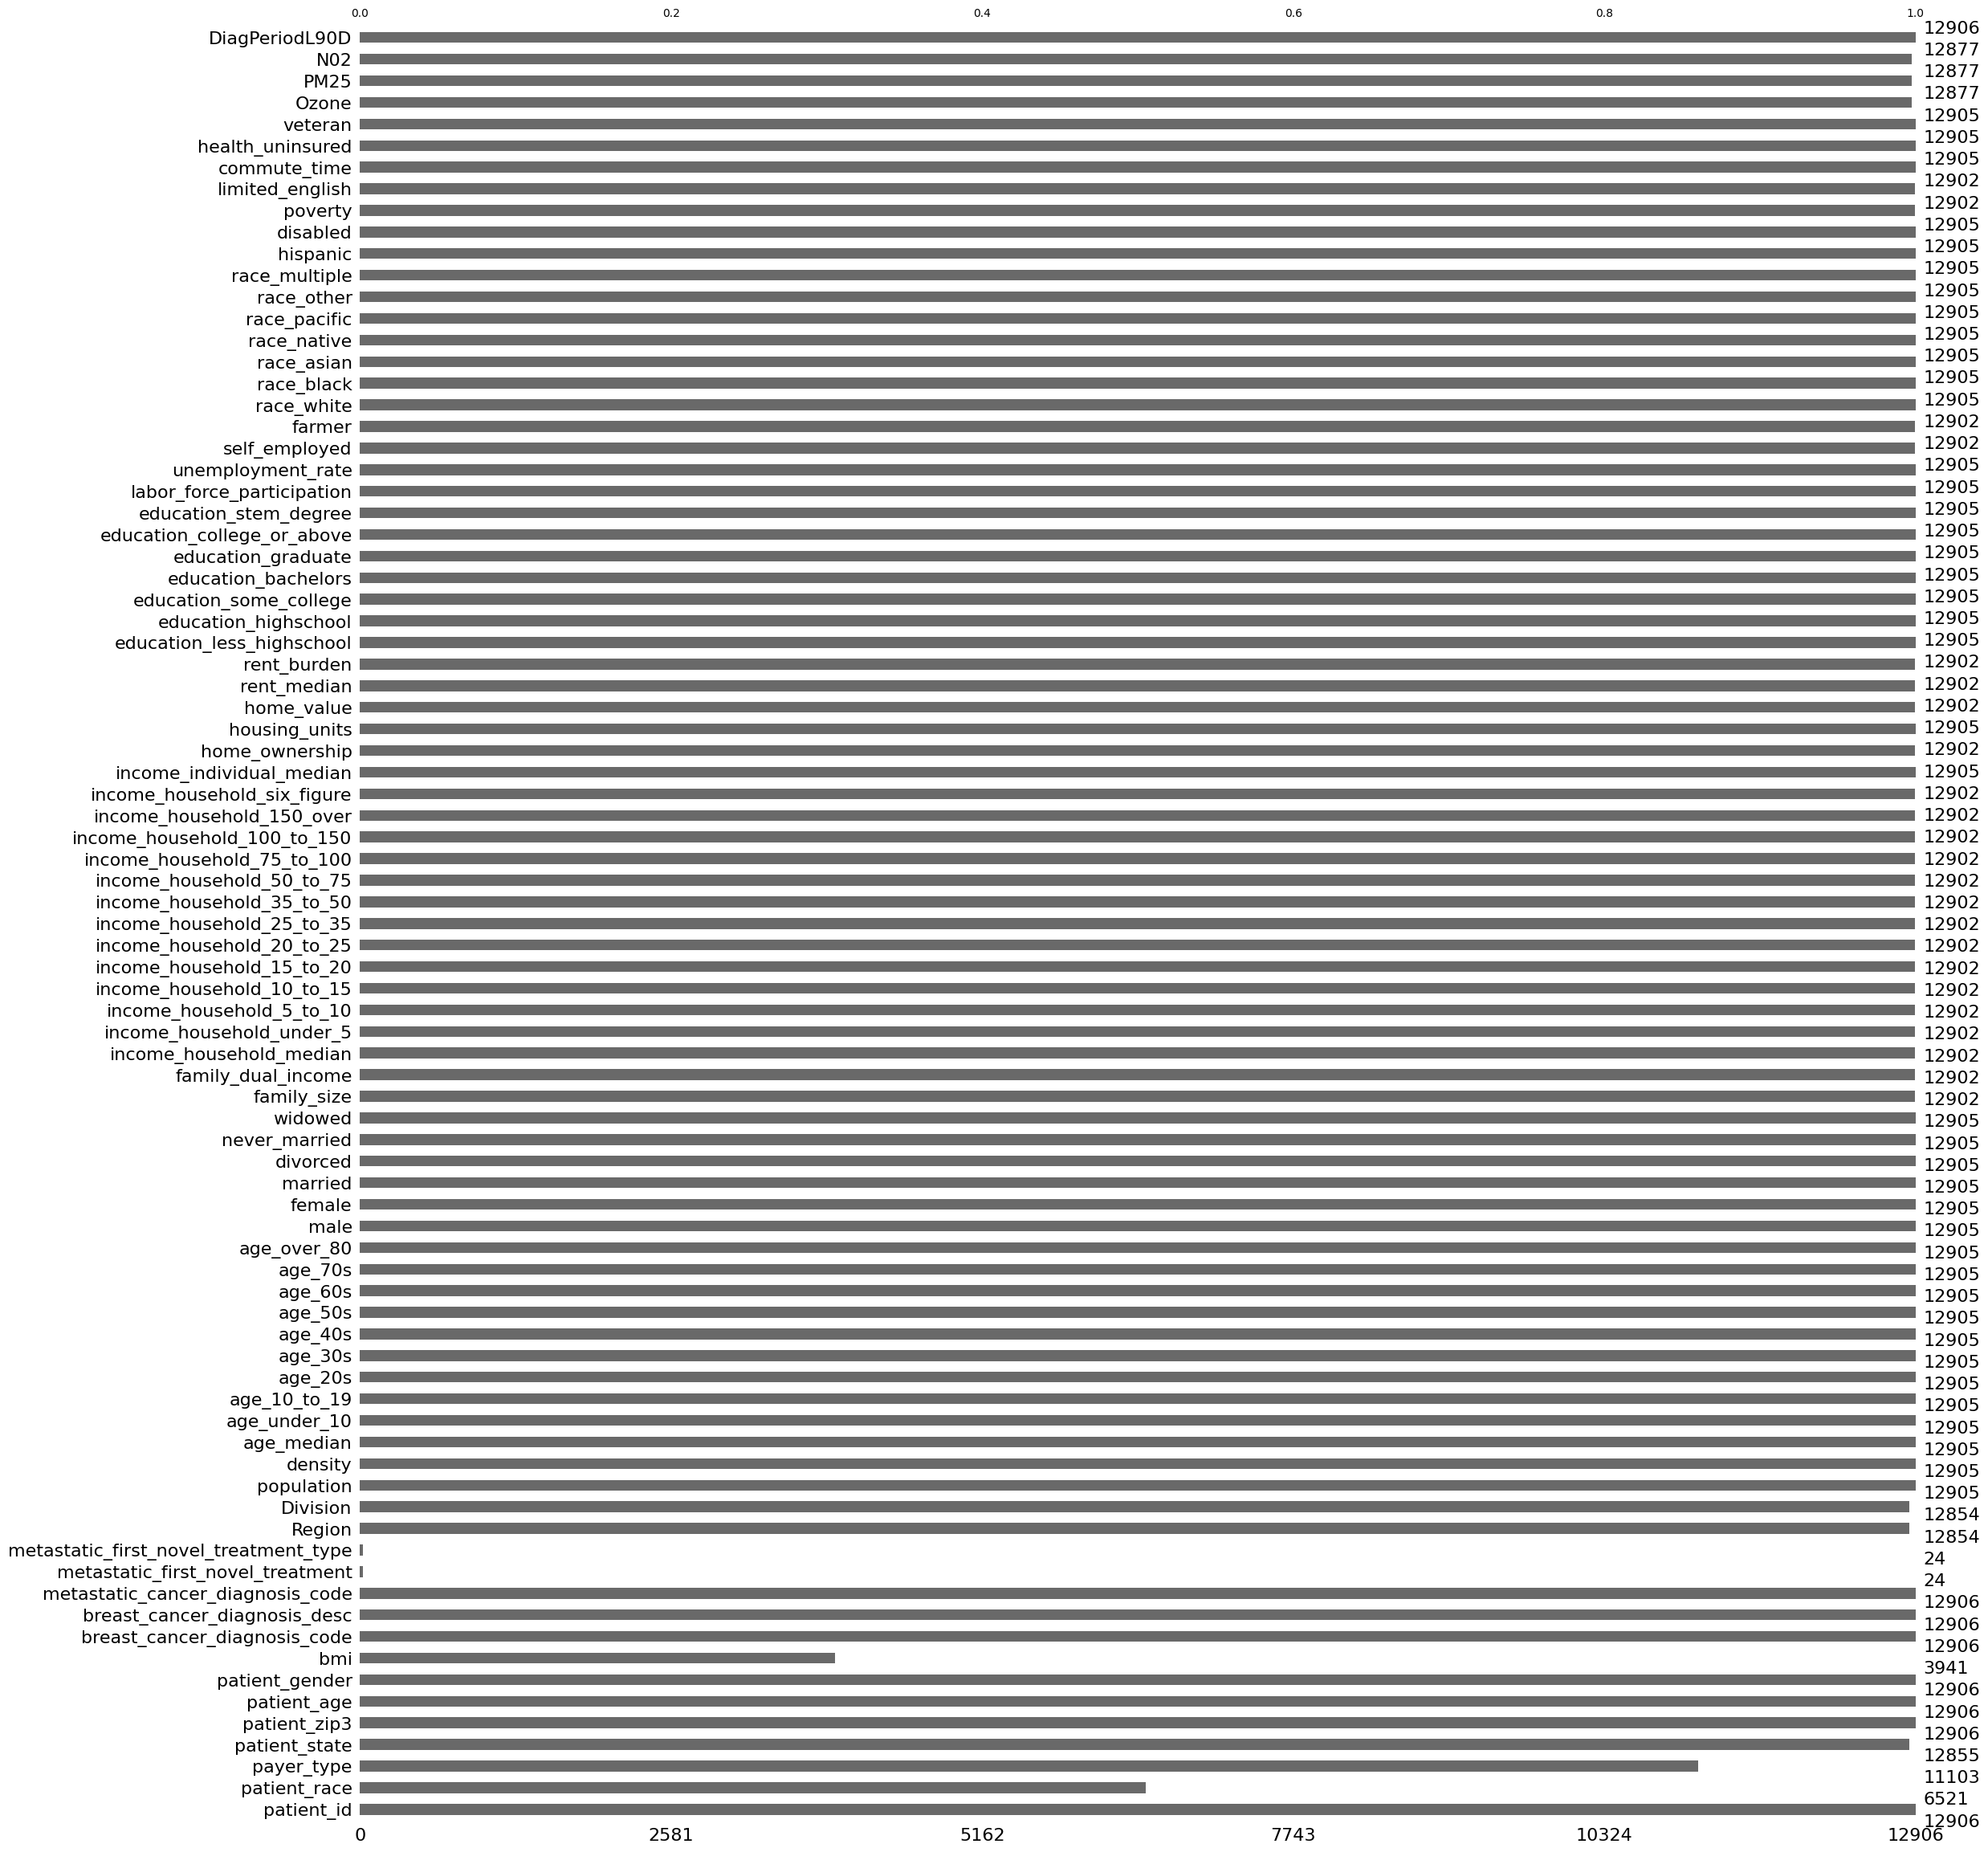

In [9]:
msno.bar(train)

<Axes: >

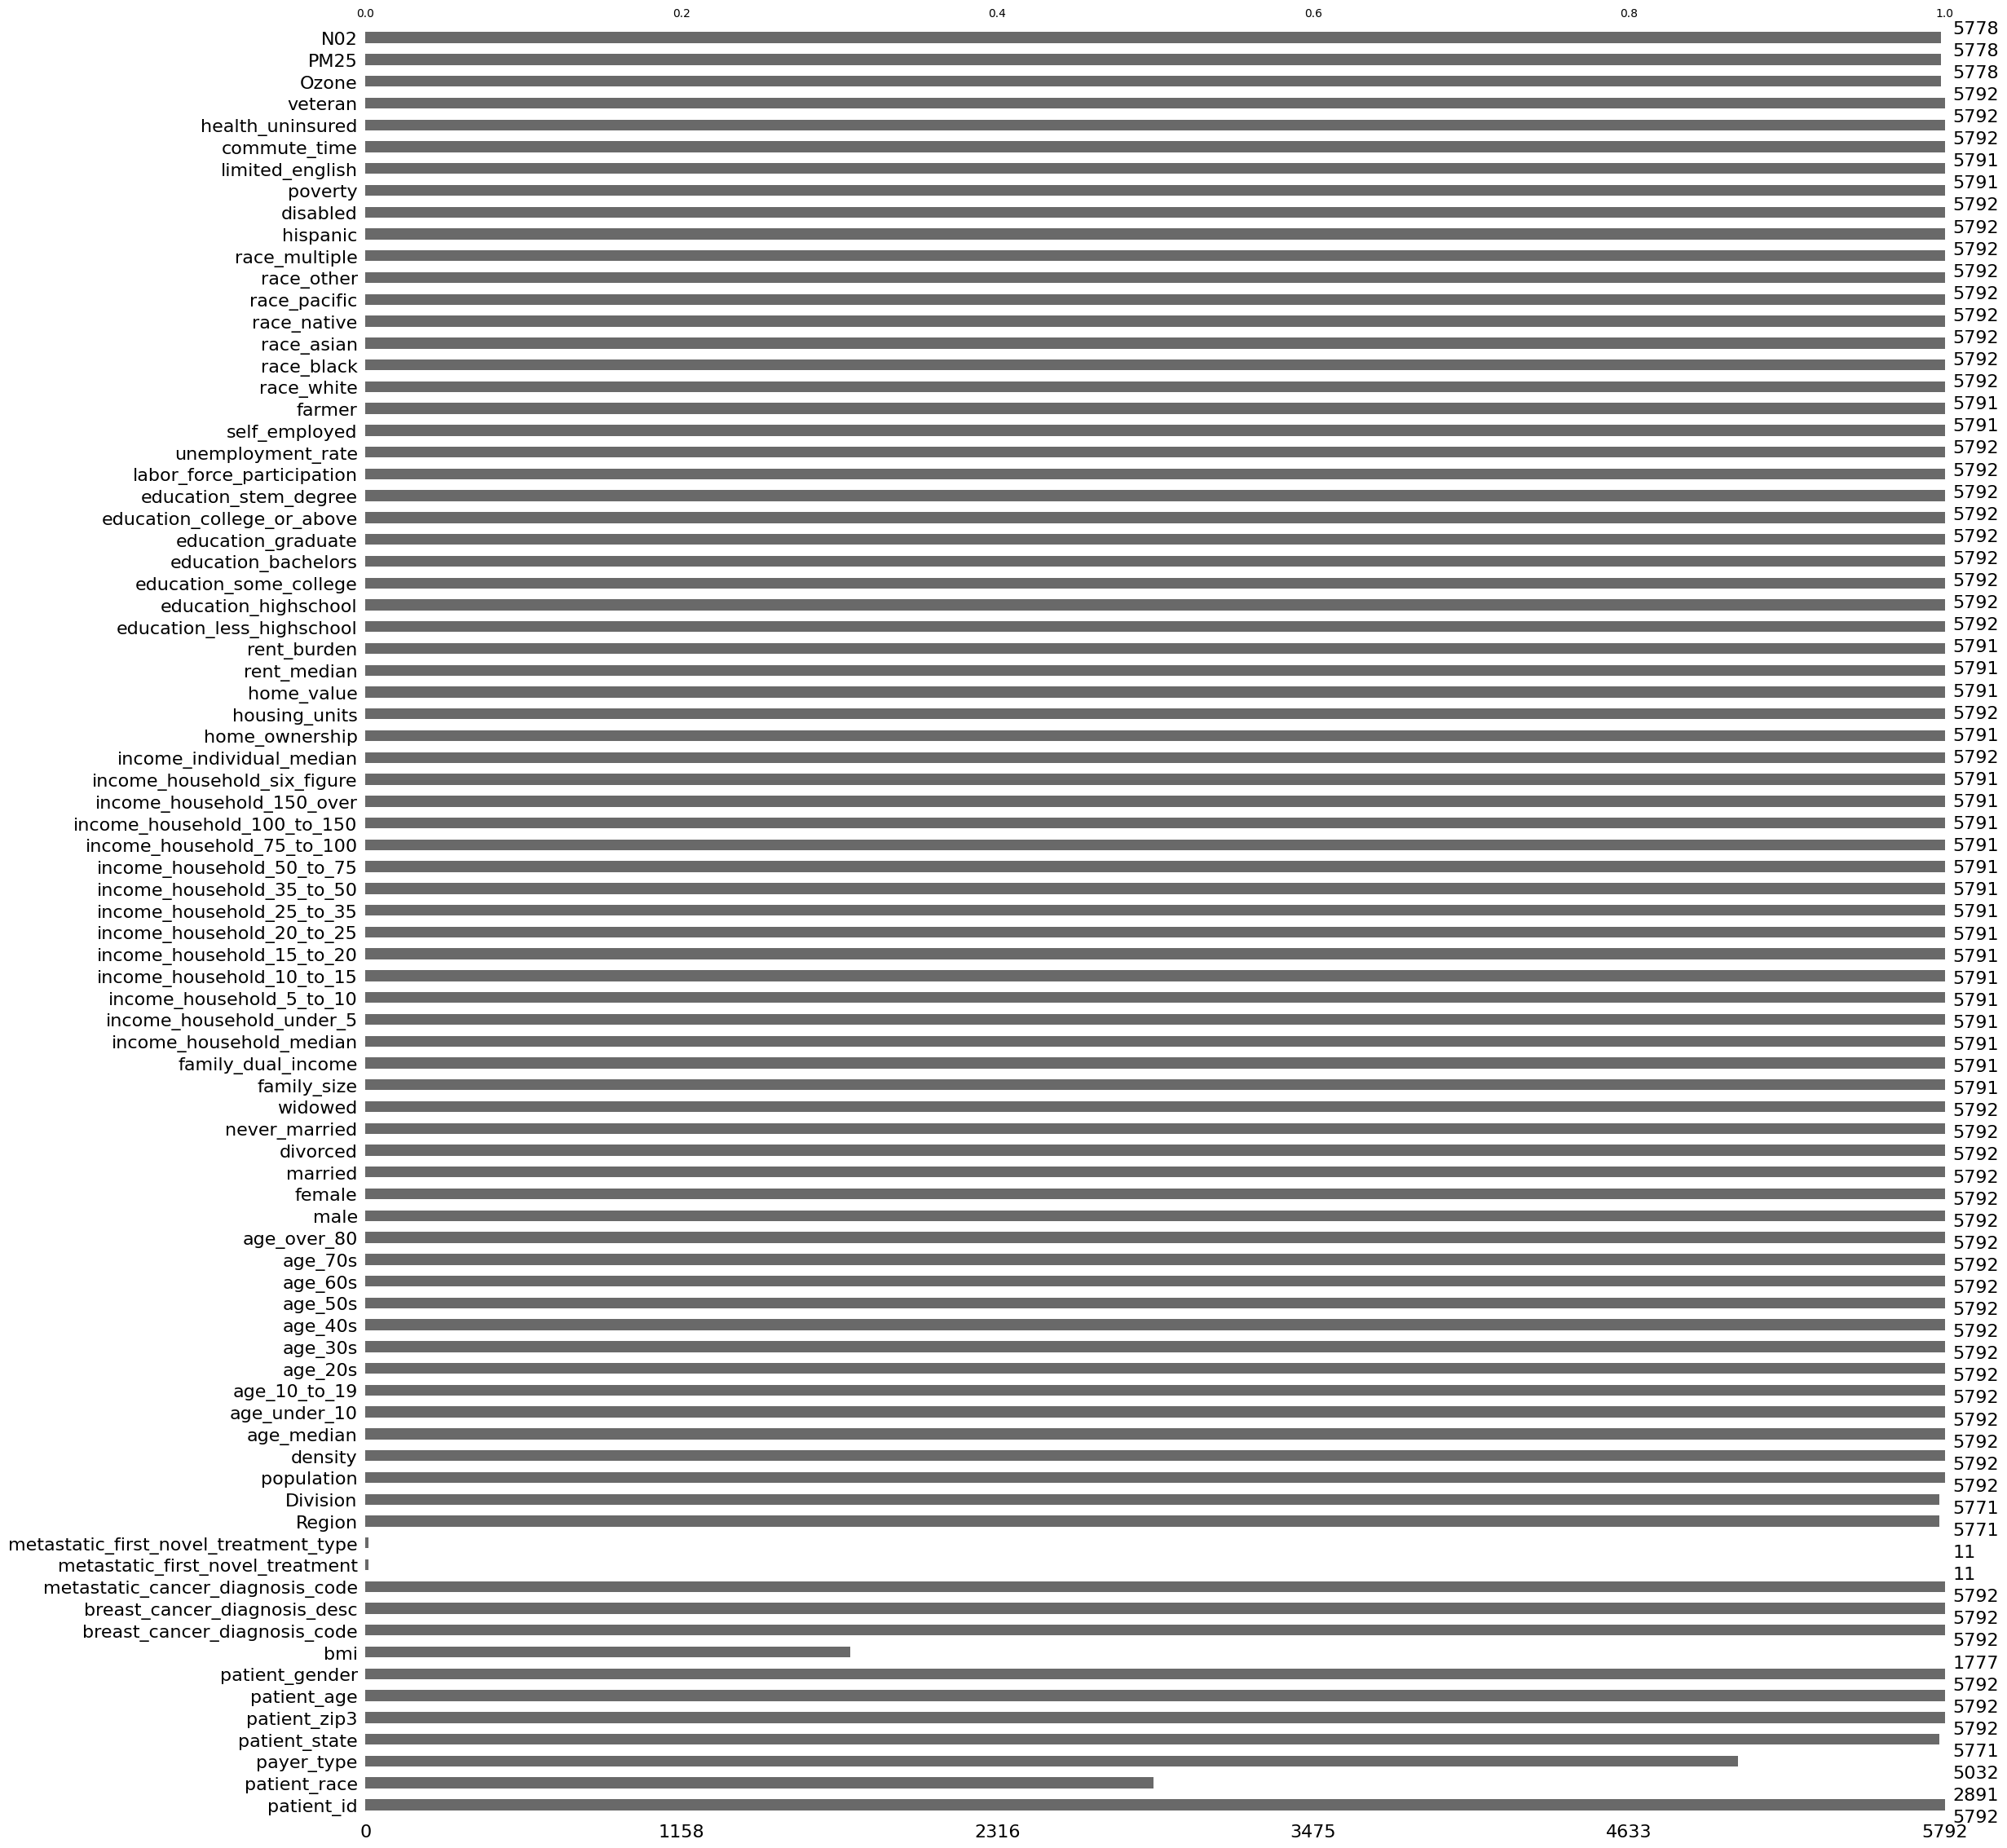

In [10]:
msno.bar(test)

In [11]:
train.isnull().sum()

patient_id           0
patient_race      6385
payer_type        1803
patient_state       51
patient_zip3         0
                  ... 
veteran              1
Ozone               29
PM25                29
N02                 29
DiagPeriodL90D       0
Length: 83, dtype: int64

In [12]:
desc = pd.DataFrame(index = list(train))
desc['type'] = train.dtypes
desc['count'] = train.count()
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] /len(train) * 100
desc['null'] = train.isnull().sum()
desc['%null'] = desc['null'] / len(train) * 100
desc = pd.concat([desc,train.describe().T.drop('count',axis=1)],axis=1)
desc.sort_values(by=['type','null']).style.background_gradient(axis=0)

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
patient_id,int64,12906,12906,100.000000,0,0.000000,547381.196033,260404.959974,100063.000000,321517.000000,543522.000000,772671.750000,999896.000000
patient_zip3,int64,12906,739,5.726019,0,0.000000,573.754300,275.447534,101.000000,331.000000,554.000000,846.000000,999.000000
patient_age,int64,12906,67,0.519138,0,0.000000,59.183326,13.335216,18.000000,50.000000,59.000000,67.000000,91.000000
DiagPeriodL90D,int64,12906,2,0.015497,0,0.000000,0.624516,0.484266,0.000000,0.000000,1.000000,1.000000,1.000000
population,float64,12905,738,5.718271,1,0.007748,20744.441237,13886.903756,635.545455,9463.896552,19154.190480,30021.278690,71374.131580
density,float64,12905,738,5.718271,1,0.007748,1581.950419,2966.305306,0.916667,171.857143,700.337500,1666.515385,21172.000000
age_median,float64,12905,728,5.640787,1,0.007748,40.502259,4.036963,20.600000,37.129825,40.639344,42.934783,54.570000
age_under_10,float64,12905,718,5.563304,1,0.007748,11.122784,1.512376,0.000000,10.160000,11.039216,12.190000,17.675000
age_10_to_19,float64,12905,725,5.617542,1,0.007748,12.945265,1.923974,6.314286,11.741176,12.923944,14.019767,35.300000
age_20s,float64,12905,724,5.609794,1,0.007748,13.290376,3.354103,5.925000,11.013415,12.538095,14.971053,62.100000


Variabile cu multe valori lipsa:
- bmi
- patient_race
- metastatic_first_novel ambele

patient_race o putem inlocui cu "unknown"

Variabila patient_gender - nu foloseste la nimic - poate fi eliminata deoarece are doar o valoare posbila

Variabilele breast_cancer_diagnosis_code, breast_cancer_diagnosis_desc, metastatic_cancer_diagnosis_code si patient_state au foarte multe categorii - nu au multe valori lipsa

payer_type , patient_race - multe valori lipsa - pot fi eventual imputate sau eliminate din analiza

metastatic_first_novel_treatment si metastatic_first_novel_treatment_type au multe valori lipsa - trebuie eliminate din analiza

## Preprocesare

In [13]:
train = train.drop(columns = ['bmi','metastatic_first_novel_treatment','metastatic_first_novel_treatment_type','patient_gender'])
test = test.drop(columns = ['bmi','metastatic_first_novel_treatment','metastatic_first_novel_treatment_type','patient_gender'])

Imputam valori pentru payer_type si patient_race

In [14]:
train['payer_type'] = train['payer_type'].fillna('Unknown')
train['patient_race'] = train['patient_race'].fillna('Unknown')
test['payer_type'] = train['payer_type'].fillna('Unknown')
test['patient_race'] = test['patient_race'].fillna('Unknown')

In [15]:
desc = pd.DataFrame(index = list(train))
desc['type'] = train.dtypes
desc['count'] = train.count()
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] /len(train) * 100
desc['null'] = train.isnull().sum()
desc['%null'] = desc['null'] / len(train) * 100
desc = pd.concat([desc,train.describe().T.drop('count',axis=1)],axis=1)
desc.sort_values(by=['type','null']).style.background_gradient(axis=0)

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
patient_id,int64,12906,12906,100.000000,0,0.000000,547381.196033,260404.959974,100063.000000,321517.000000,543522.000000,772671.750000,999896.000000
patient_zip3,int64,12906,739,5.726019,0,0.000000,573.754300,275.447534,101.000000,331.000000,554.000000,846.000000,999.000000
patient_age,int64,12906,67,0.519138,0,0.000000,59.183326,13.335216,18.000000,50.000000,59.000000,67.000000,91.000000
DiagPeriodL90D,int64,12906,2,0.015497,0,0.000000,0.624516,0.484266,0.000000,0.000000,1.000000,1.000000,1.000000
population,float64,12905,738,5.718271,1,0.007748,20744.441237,13886.903756,635.545455,9463.896552,19154.190480,30021.278690,71374.131580
density,float64,12905,738,5.718271,1,0.007748,1581.950419,2966.305306,0.916667,171.857143,700.337500,1666.515385,21172.000000
age_median,float64,12905,728,5.640787,1,0.007748,40.502259,4.036963,20.600000,37.129825,40.639344,42.934783,54.570000
age_under_10,float64,12905,718,5.563304,1,0.007748,11.122784,1.512376,0.000000,10.160000,11.039216,12.190000,17.675000
age_10_to_19,float64,12905,725,5.617542,1,0.007748,12.945265,1.923974,6.314286,11.741176,12.923944,14.019767,35.300000
age_20s,float64,12905,724,5.609794,1,0.007748,13.290376,3.354103,5.925000,11.013415,12.538095,14.971053,62.100000


In [16]:
desc = pd.DataFrame(index = list(test))
desc['type'] = test.dtypes
desc['count'] = test.count()
desc['nunique'] = test.nunique()
desc['%unique'] = desc['nunique'] /len(test) * 100
desc['null'] = test.isnull().sum()
desc['%null'] = desc['null'] / len(test) * 100
desc = pd.concat([desc,test.describe().T.drop('count',axis=1)],axis=1)
desc.sort_values(by=['type','null']).style.background_gradient(axis=0)

,type,count,nunique,%unique,null,%null,mean,std,min,25%,50%,75%,max
patient_id,int64,5792,5792,100.000000,0,0.000000,549946.787983,260988.833446,100266.000000,320284.500000,553042.000000,778552.250000,999890.000000
patient_zip3,int64,5792,679,11.723066,0,0.000000,570.217887,275.314510,101.000000,329.000000,554.000000,836.000000,996.000000
patient_age,int64,5792,67,1.156768,0,0.000000,59.274862,13.076323,18.000000,50.000000,59.000000,67.000000,91.000000
population,float64,5792,679,11.723066,0,0.000000,20266.872152,13694.738314,829.515152,8863.550000,18711.016665,28996.772730,71374.131580
density,float64,5792,679,11.723066,0,0.000000,1510.471786,2883.409750,0.821739,161.925000,626.236667,1612.851111,21172.000000
age_median,float64,5792,670,11.567680,0,0.000000,40.575472,4.029852,20.600000,37.190476,40.640909,43.085938,54.570000
age_under_10,float64,5792,660,11.395028,0,0.000000,11.119250,1.478579,0.000000,10.160000,11.039216,12.143396,16.481818
age_10_to_19,float64,5792,668,11.533149,0,0.000000,12.919191,1.909698,6.314286,11.726471,12.923944,13.904830,35.300000
age_20s,float64,5792,667,11.515884,0,0.000000,13.218348,3.294389,5.925000,10.996226,12.531646,14.937500,62.100000
age_30s,float64,5792,668,11.533149,0,0.000000,12.841374,2.358636,1.500000,11.211818,12.404348,14.037838,25.471429


In [17]:
for column in train.columns:
    null_count = train[column].isnull().sum()
    if null_count > 0:
        percent_nulls = (null_count / train.shape[0]) * 100
        print(f'{column} : {percent_nulls:.2f}% nulls')

patient_state : 0.40% nulls
Region : 0.40% nulls
Division : 0.40% nulls
population : 0.01% nulls
density : 0.01% nulls
age_median : 0.01% nulls
age_under_10 : 0.01% nulls
age_10_to_19 : 0.01% nulls
age_20s : 0.01% nulls
age_30s : 0.01% nulls
age_40s : 0.01% nulls
age_50s : 0.01% nulls
age_60s : 0.01% nulls
age_70s : 0.01% nulls
age_over_80 : 0.01% nulls
male : 0.01% nulls
female : 0.01% nulls
married : 0.01% nulls
divorced : 0.01% nulls
never_married : 0.01% nulls
widowed : 0.01% nulls
family_size : 0.03% nulls
family_dual_income : 0.03% nulls
income_household_median : 0.03% nulls
income_household_under_5 : 0.03% nulls
income_household_5_to_10 : 0.03% nulls
income_household_10_to_15 : 0.03% nulls
income_household_15_to_20 : 0.03% nulls
income_household_20_to_25 : 0.03% nulls
income_household_25_to_35 : 0.03% nulls
income_household_35_to_50 : 0.03% nulls
income_household_50_to_75 : 0.03% nulls
income_household_75_to_100 : 0.03% nulls
income_household_100_to_150 : 0.03% nulls
income_hous

In [18]:
test

,patient_id,patient_race,payer_type,patient_state,patient_zip3,patient_age,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,Region,...,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Ozone,PM25,N02
0,573710,White,MEDICAID,IN,467,54,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,Midwest,...,3.564516,13.996774,7.985484,0.969355,24.955357,10.838710,8.080645,38.724876,7.947165,11.157161
1,593679,Unknown,COMMERCIAL,FL,337,52,C50912,Malignant neoplasm of unspecified site of left...,C787,South,...,10.261538,16.020513,13.602564,2.836842,23.952632,10.579487,9.302564,36.918257,7.838973,13.599985
2,184532,Hispanic,COMMERCIAL,CA,917,61,C50911,Malignant neoplasm of unsp site of right femal...,C773,West,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
3,447383,Hispanic,COMMERCIAL,CA,917,64,C50912,Malignant neoplasm of unspecified site of left...,C779,West,...,47.726087,9.895652,10.515217,12.745652,32.530435,7.263043,3.810870,47.310325,9.595719,20.084231
4,687972,Black,COMMERCIAL,CA,900,40,C50412,Malig neoplasm of upper-outer quadrant of left...,C779,West,...,45.526154,11.901538,20.760000,14.737500,30.709375,10.341538,3.030769,41.186992,11.166898,21.644261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,977076,White,COMMERCIAL,KY,404,63,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,South,...,1.243478,20.404348,20.813636,0.350000,30.152174,6.473913,5.908696,39.947326,7.622672,9.154618
5788,922960,White,MEDICAID,IA,507,69,C50912,Malignant neoplasm of unspecified site of left...,C773,Midwest,...,6.175000,16.675000,15.900000,2.800000,16.800000,5.475000,6.875000,35.825340,7.610534,9.712786
5789,759690,Unknown,MEDICAID,WA,980,84,C50411,Malig neoplm of upper-outer quadrant of right ...,C773,West,...,9.511321,9.752830,6.432075,5.094340,31.275472,5.309434,5.807547,36.618644,4.939852,23.393650
5790,911717,Unknown,MEDICARE ADVANTAGE,OK,740,58,1749,"Malignant neoplasm of breast (female), unspeci...",C773,South,...,4.374627,15.544776,16.603030,0.513636,25.877273,14.926866,7.600000,39.832235,8.030925,9.769358


In [19]:
# 1.2. Data Type Conversion
train['patient_zip3'] = train['patient_zip3'].astype(str)
test['patient_zip3'] = test['patient_zip3'].astype(str)

In [20]:
# 1.1. Dropping high nulls columns
# Iterating through each column in the train dataframe
for column in train.columns:
    # Counting the number of null values in the current column
    null_count = train[column].isnull().sum()
    # Calculating the percentage of null values in the current column
    percent_nulls = (null_count / train.shape[0]) * 100
    # Dropping columns with more than 1% null values
    if percent_nulls > 1:
        # Dropping the column from the train dataframe
        train.drop(columns=column, axis=1, inplace=True)
        # Dropping the column from the test dataframe
        test.drop(columns=column, axis=1, inplace=True)

In [21]:
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.fit_transform(test[col])

NameError: name 'categorical_cols' is not defined

In [ ]:
# 1.4. Imputing missing values 
# Selecting categorical columns
categorical_cols = train.select_dtypes(include=['object', 'category']).columns

# Selecting numerical columns
numerical_cols = train.select_dtypes(include=['float64', 'int64']).columns

# Imputing missing values in categorical columns using mode
for col in categorical_cols:
    # Skipping 'DiagPeriodL90D' column
    if col != 'DiagPeriodL90D':
        # Finding the mode of the column
        mode = train[col].mode()[0]
        # Filling missing values with the mode in the train and test datasets
        train[col].fillna(mode, inplace = True)
        test[col].fillna(mode, inplace = True)

# Imputing missing values in numerical columns using mean
for col in numerical_cols:
    # Skipping 'DiagPeriodL90D' column
    if col != 'DiagPeriodL90D':
        # Finding the mean of the column
        mean = train[col].mean()
        # Filling missing values with the mean in the train and test datasets
        train[col].fillna(mean, inplace = True)
        test[col].fillna(mean, inplace = True)

In [ ]:
train.fillna(0.0, inplace = True)
test.fillna(0.0, inplace = True)

In [ ]:
for column in train.columns:
    null_count = train[column].isnull().sum()
    if null_count > 0:
        percent_nulls = (null_count / train.shape[0]) * 100
        print(f'{column} : {percent_nulls:.2f}% nulls')

In [ ]:
msno.bar(train)

In [ ]:
msno.bar(test)

## Variabilele de input:

In [ ]:
print(f"Train data: {train.shape} \nTest data: {test.shape}")

Separam variabila target de restul:

In [ ]:
# Separarea variabilei TARGET
X = train.drop('DiagPeriodL90D', axis=1)
y = train['DiagPeriodL90D']

In [ ]:
# Train test split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

## Verificam outlieri

In [ ]:
fig, ax = plt.subplots(12,6, figsize=(25,25), dpi=300) 
ax = ax.flatten()
for i, col in enumerate(numerical_cols):
    if col != 'DiagPeriodD90L':
        sns.kdeplot(train[col],ax=ax[i],color='b')
        sns.kdeplot(test[col],ax=ax[i],color='g')    
        ax[i].set_title(f'{col}')
        ax[i].set_xlabel(None)    

for j in range(len(numerical_cols),len(ax)):
    if col != 'DiagPeriodD90L':
        ax[j].axis('off')
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Train', 'Test'])
plt.tight_layout(h_pad=0.1, w_pad=0.5)
plt.show()

In [ ]:
for col in numerical_cols:
    if col != 'DiagPeriodD90L':
        fig, ax = plt.subplots(figsize = (8,6))
        sns.boxplot(y = train[col], color = 'red', whis = 3)
        plt.show()

Sunt f multe variabile care au outlieri, aplicam o metoda pt corectarea outlierilor la toate

In [ ]:
# Let's Cap the outliers at 1.5* IQR
def treat_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = df[col].apply(lambda x: min(upper_bound, max(lower_bound, x)))

numerical_cols = train.select_dtypes(include='number').drop(columns=['DiagPeriodL90D', 'patient_id']).columns
# Treat outliers for each numerical column
for col in train.select_dtypes(include='number').columns:
    treat_outliers(train, col)

for col in test.select_dtypes(include='number').columns:
    treat_outliers(test, col)

In [ ]:
for col in numerical_cols:
    fig, ax = plt.subplots(figsize = (8,6))
    sns.boxplot(y = train[col], color = 'red', whis = 3)
    plt.show()

In [ ]:
fig, ax = plt.subplots(12,6, figsize=(25,25), dpi=300) 
ax = ax.flatten()
for i, col in enumerate(numerical_cols):
    sns.kdeplot(train[col],ax=ax[i],color='b')
    sns.kdeplot(test[col],ax=ax[i],color='g')    
    ax[i].set_title(f'{col}')
    ax[i].set_xlabel(None)    
    
for j in range(len(numerical_cols),len(ax)):
    ax[j].axis('off')
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Train', 'Test'])
plt.tight_layout(h_pad=0.1, w_pad=0.5)
plt.show()

## Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators = 300, max_depth = 5, n_jobs = -1, random_state = 123)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_predict = rf.predict(X_test)
y_predict

In [ ]:
accuracy = accuracy_score(y_test, y_predict)
print('Acuratetea modelului Random Forest este:', accuracy)

In [ ]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

In [ ]:
fig, ax = plt.subplots(figsize =(10,8))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.show

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Absolute Error: " + str(mean_absolute_error(y_predict, y_test)))
print("RMSE:" + str(mean_squared_error(y_test, y_predict, squared=False)))

In [ ]:
auc_score = roc_auc_score(y_test, y_predict)
print ('Scorul AUC:', auc_score)

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_predict)
plt.plot(fpr,tpr)

## XGBoost

In [ ]:
xgb = XGBClassifier(n_estimators = 200, max_depth = 3, learning_rate = 0.1, n_jobs = -1, random_state = 10, enable_categorical = True)

In [ ]:
xgb.fit(X_train, y_train)

In [ ]:
y_predict = xgb.predict(X_test)

In [ ]:
len(y_predict)

In [ ]:
accuracy = accuracy_score(y_test, y_predict)
print('Acuratetea pentru XGBoost:', accuracy)

In [ ]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

In [ ]:
print("Mean Absolute Error: " + str(mean_absolute_error(y_predict, y_test)))
print("RMSE:" + str(mean_squared_error(y_test, y_predict, squared=False)))

In [ ]:
auc_score = roc_auc_score(y_test, y_predict)
print ('Scorul AUC:', auc_score)

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_predict)
plt.plot(fpr,tpr)

## Hyperparameter tuning

### Random Forest:

In [ ]:
random_state = [0,10,15,20,35,40,42]

In [ ]:
rezultate = []
for rs in random_state:
        rf = RandomForestClassifier(n_estimators = 200, max_depth = 10, n_jobs = -1, random_state = rs)
        rf.fit(X_train, y_train)
        y_predict = rf.predict(X_test)
        auc_score = roc_auc_score(y_test, y_predict)
        rezultate.append({'random_state': rs, 'auc': auc_score})

In [ ]:
rezultate

Orice as schimba, scorul pentru Random Forest ramane neschimbat.

In [ ]:
n_estimators = [100, 200, 300]
max_depth = [3,4,5]
learning_rate=[0.1,0.05,0.15]

In [ ]:
rezultate = []
for est in n_estimators:
    for md in max_depth:
        for lr in learning_rate:
            xgb = XGBClassifier(n_estimators = est, max_depth = md, learning_rate = lr, n_jobs = -1, random_state = 10, subsample = 0.6, colsample_bytree=0.5)
            xgb.fit(X_train, y_train)
            y_predict = xgb.predict(X_test)
            auc_score = roc_auc_score(y_test, y_predict)
            rezultate.append({'estimators': est, 'max_depth': md, 'learning_rate': lr,'auc': auc_score})

In [ ]:
rezultate

In [ ]:
lista_auc = []
for solutie in rezultate:
    lista_auc.append(solutie["auc"])
max_auc = max(lista_auc)
max_auc

In [ ]:
for solutie in rezultate:
    if solutie["auc"] == max_auc:
        print(f'''
estimators: {solutie["estimators"]}
max_depth: {solutie["max_depth"]}
learning_rate: {solutie["learning_rate"]}
auc: {solutie["auc"]}
                ''')
        optim_estimators = solutie["estimators"]
        optim_max_depth = solutie["max_depth"]
        optim_learning_rate = solutie["learning_rate"]


In [ ]:
xgb = XGBClassifier(n_estimators = optim_estimators, max_depth = optim_max_depth, learning_rate = optim_learning_rate, n_jobs = -1, random_state = 10, enable_categorical = True)
xgb.fit(X_train, y_train)

In [ ]:
y_predict = xgb.predict(X_test)

In [ ]:
auc_score = roc_auc_score(y_test, y_predict)
auc_score

## Output file

In [ ]:
#if rerunning the code:
test = test.drop(['DiagPeriodL90D'], axis = 1)

In [ ]:
#Apply the model to your test dataset
test['DiagPeriodL90D']=xgb.predict(test)

In [ ]:
test.head(30)

In [ ]:
#Make the submission file

output = pd.DataFrame({'patient_id': test['patient_id'], 'DiagPeriodL90D': test['DiagPeriodL90D']})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")